<ipython-input-14-537075100f80>:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


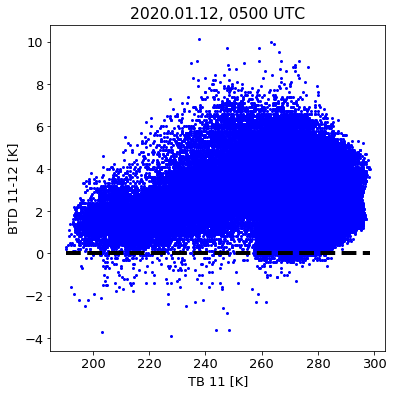

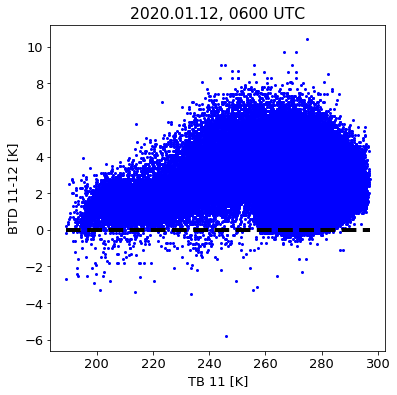

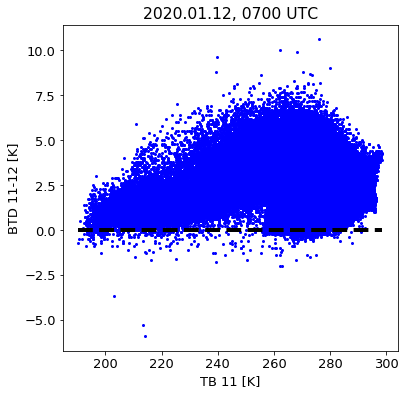

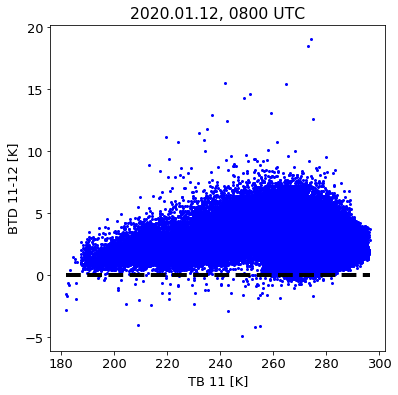

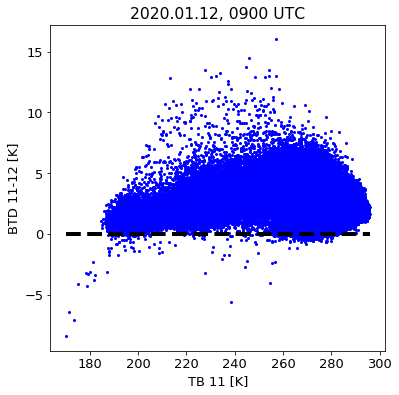

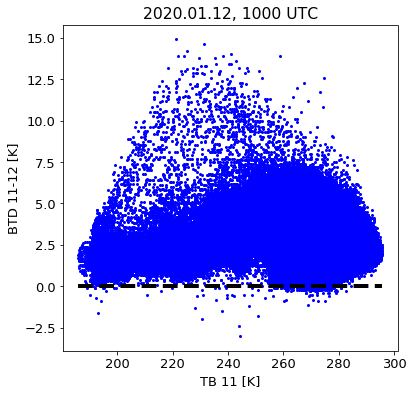

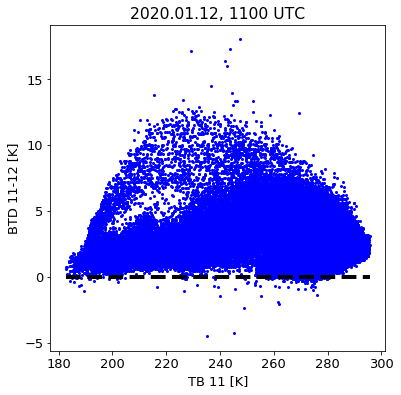

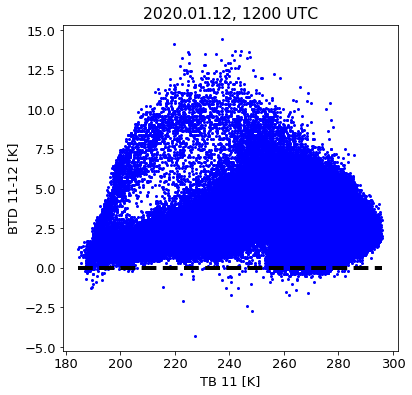

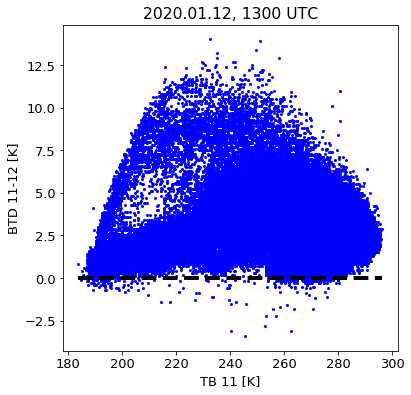

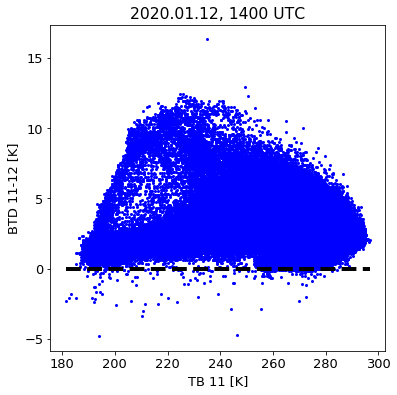

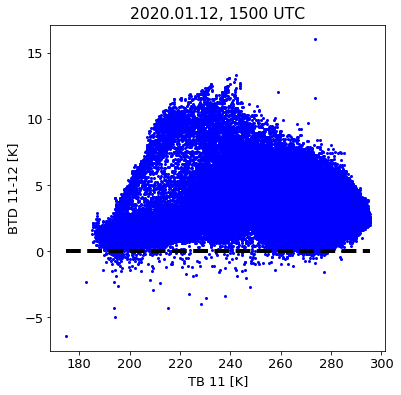

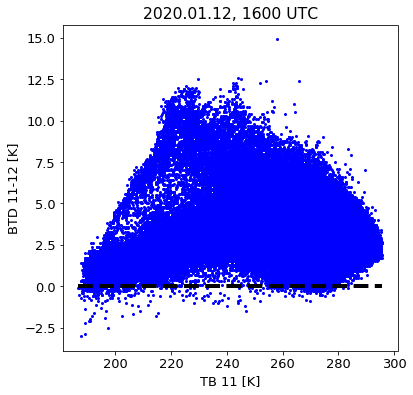

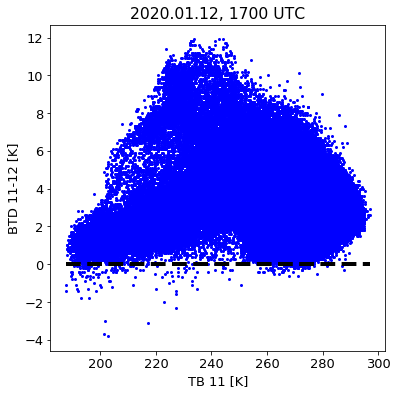

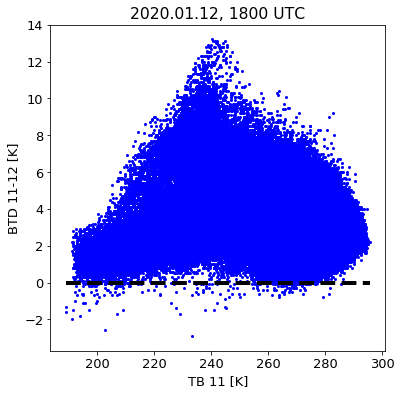

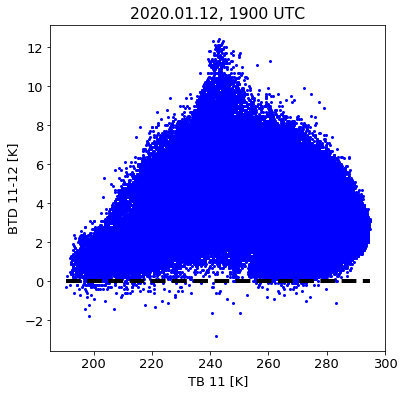

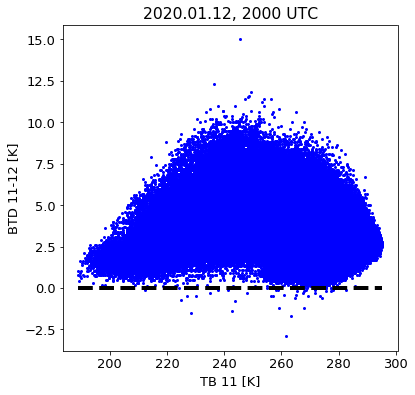

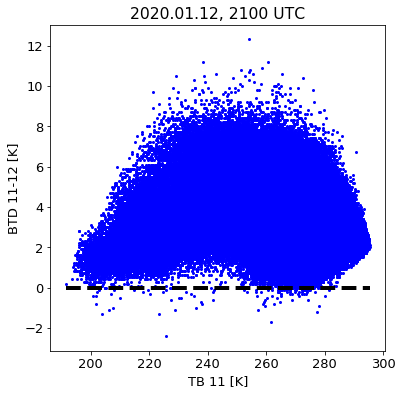

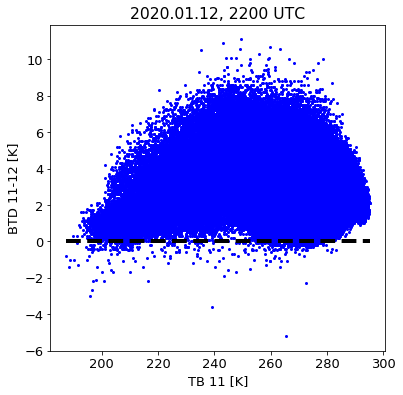

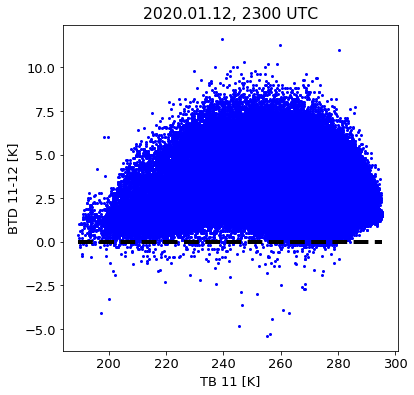

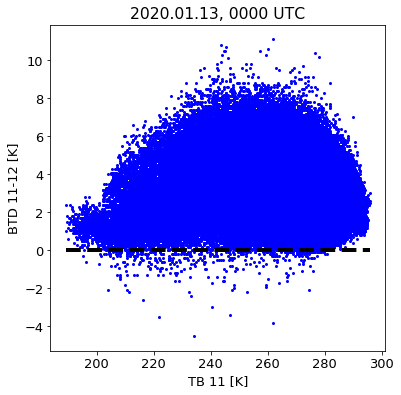

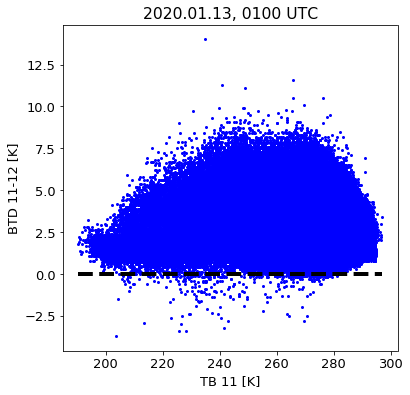

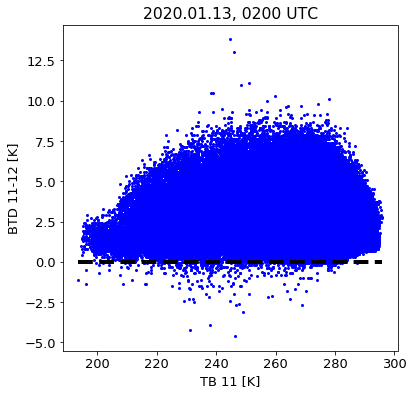

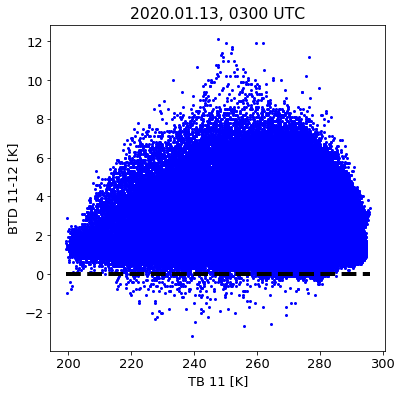

In [14]:
# To plot FY-4A BTD (T11-T12) vs T11 scatterplot by jhlee

from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma


# file path
dir = '/storage1/jhlee/NMSC_2018/FY_4A_AGRI/'


# Read 4 km lat/lon
f = Dataset(dir + 'LatLon_4000m.nc', 'r')
lat = f.variables['Latitude'][:]
lon = f.variables['Longitude'][:]


# Const. Target area
llcrnrlat = 10.
urcrnrlat = 30.
llcrnrlon = 115.
urcrnrlon = 135.


# font size
plt.rc('font', size=13)


# Read FY-4A channel 12 and 13 digital numbers
hr = ['05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23', '00','01','02','03']
for i in hr:
    year = '2020'
    month = '01'
    day = '12'
    hour = i    
    if (hour == '00' or hour =='01' or hour =='02' or hour =='03'): day = '13'
    sttime = year + month + day + hour
    fname = dir + 'FY4A-_AGRI--_N_DISK_1047E_L1-_FDI-_MULT_NOM_'+sttime+'0000_'+sttime+'1459_4000M_V0001.HDF'
    f = Dataset(fname, 'r')
    
    dn11  = f.variables['NOMChannel12'][:]
    cal11 = f.variables['CALChannel12'][:]
    dn12  = f.variables['NOMChannel13'][:]
    cal12 = f.variables['CALChannel13'][:]

    dn11  = np.array(dn11)
    cal11 = np.array(cal11)
    dn12  = np.array(dn12)
    cal12 = np.array(cal12)

    # TB 11
    idx = np.where(dn11 == 65535.)
    dn11[idx] = -65535.
    tb_11 = cal11[dn11-1]
    idx   = np.where(dn11 == 0)
    tb_11[idx] = np.nan
      
    # TB 12
    idx = np.where(dn12 == 65535.)
    dn12[idx] = -65535.
    tb_12 = cal12[dn12-1]
    idx   = np.where(dn12 == 0)
    tb_12[idx] = np.nan
        
    
# Target area
    btd_11_12 = tb_11 - tb_12
    btd_11_12[lat < llcrnrlat] = np.nan
    btd_11_12[lat > urcrnrlat] = np.nan
    btd_11_12[lon < llcrnrlon] = np.nan
    btd_11_12[lon > urcrnrlon] = np.nan
    tb_11[lat < llcrnrlat] = np.nan
    tb_11[lat > urcrnrlat] = np.nan
    tb_11[lon < llcrnrlon] = np.nan
    tb_11[lon > urcrnrlon] = np.nan
    
    
    
# Plot BTD (T11-T12) vs T11 scatterplot
    plt.figure(figsize=(6,6))
    plt.plot(tb_11, btd_11_12, 'bo', markersize=2)
    plt.xlabel('TB 11 [K]')
    plt.ylabel('BTD 11-12 [K]')
    plt.plot([np.nanmin(tb_11),np.nanmax(tb_11)], [0,0], 'k--', linewidth=4)

# show result plot
    plt.title('%s.%s.%s, %s00 UTC' %(year, month, day, hour))
    plt.savefig('../plots/FY4A_BTD(T11-12)_T11_scatterplot/FY4A_BTD_scatter_'+sttime+'0000.png', dpi=300)
#    plt.show()